Principle Componenet Analysis (PCA)
The math is set up to follow python conventions of handling things


Steps:
Center data set around zero
Find covariance Matrix
Find Eigen values and vectors of covaraiance matrix

Cool things you can do with PCA:
Look at eigen values to find which PCs are important and reduce dimensions
reorient data around the PCs

Some definitions:
$$X = \begin{bmatrix}x_0 \\ x_1 \\ \vdots \\ x_n \end{bmatrix}$$
where $x$ is a vector of $d$ dimensions. That means there will be $d$ principle components (PC).

Step 1. Center around zero
Let $\mu$ be the centroid of $X$ (the average $x$ in $X$).
$$\mu_{d} = \frac{1}{n}\sum_{i=0}^{n-1}X_{i,d}$$
Let $X'$ be $X$ centered around zero:
$$x' = x - \mu$$
$$X' = \begin{bmatrix}x_0 - \mu \\ x_1 - \mu \\ \vdots \\ x_n - \mu \end{bmatrix} = \begin{bmatrix}x'_0 \\ x'_1 \\ \vdots \\ x'_n\end{bmatrix}$$
This would make the new centroid $\mu'_{d} = 0$


Step 2. Find Covariance Matrix ($\Sigma$ or $cov$)
$$\Sigma_{i,j} = cov(X'_{:,i},X'_{:,j}) = E[(X'_{:,i} - \mu'_{i}) (X'_{:,j} - \mu'_{j})]$$
But wait! We centered around zero and $\mu' = 0$
$$\Sigma_{i,j} = cov(X'_{:,i},X'_{:,j}) = E[X'_{:,i}X'_{:,j}]$$
Another way of writing this is:
$$\Sigma = \frac{1}{n}X'^{T} X'$$
or
$$\Sigma = \begin{bmatrix}
\sigma_{0,0}^2 & \sigma_{0,1}^2  & \cdots & \sigma_{0,d}^{2} \\ 
\sigma_{1,0}^2 & \sigma_{1,1}^2  & \cdots & \sigma_{1,d}^{2} \\ 
\vdots &  & \ddots & \vdots \\ 
\sigma_{d,0}^2 & \sigma_{d,1}^2  & \cdots & \sigma_{d,d}^{2}
\end{bmatrix}$$

Step 3. Find eigen values and vectors
$$det(\Sigma - \lambda I) = 0$$
Solve for $\lambda$.
$$\Sigma - \lambda_{i} I = \lambda_{i} e_{i}$$
where $e_{i}$ is an eigen vector and PC$_{i}$. The greater the $\lambda$, the greater the variance in that PC.




In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import numpy as np
from sklearn.decomposition import PCA

[[ 12016.71309192   9136.23457789]
 [  9136.23457789  12231.91767791]]
[[-0.71125829 -0.70293075]
 [ 0.70293075 -0.71125829]]
0.0


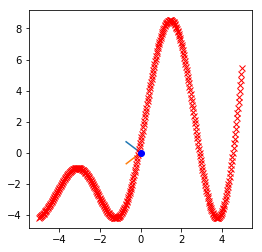

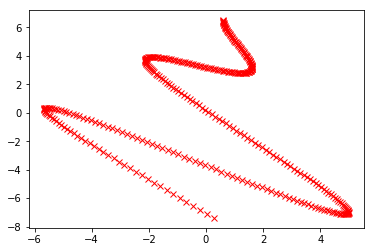

In [2]:
# Doing PCA by hand - sort of
x = np.linspace(0,10,360)
y = np.zeros(len(x))

for i, v in enumerate(x):
    y[i] = v + np.sin(i/180 * np.pi * 2) * v

x_bar = np.average(x)
y_bar = np.average(y)

xt = x - x_bar
yt = y - y_bar

vx = np.sum(x**2)
vy = np.sum(y**2)

vxy = np.sum(x*y)
cov_hand = np.array([[vx, vxy],[vxy, vy]])
print(cov_hand)
w_hand, v_hand = np.linalg.eig(cov_hand) # okay this part I don't want to do by hand
print(v_hand)
v1 = v_hand[:,0]
v2 = v_hand[:,1]
print(np.dot(v1,v2))
f = plt.figure(figsize=(4,4))
plt.plot([0,v_hand[0,0]],[0,v_hand[1,0]])
plt.plot([0,v_hand[0,1]],[0,v_hand[1,1]])
plt.plot(xt,yt,'rx')
plt.plot(0, 0, 'bo')

plt.show()
xx = np.array([xt, yt])


PC = np.matmul(np.array([xt, yt]).T, v_hand)


plt.plot(PC[:,0], PC[:,1], 'rx') # x-axis is the PC with the greatest Variance in the cov_hand
plt.show()

In [3]:
data = []
for i in range(0,360,10):
    data.append([np.cos(i/180 * np.pi), 2*np.sin(i/180 * np.pi),i/240])
data = np.array(data)


In [13]:
def plot_pca(cluster):
    ave = np.array([np.average(dimension_values) for dimension_values in cluster.T])
    # PCA is doing this all centered around zero
    pca = PCA(n_components=len(ave))
    pca.fit(cluster)
    covariance = pca.get_covariance()
    print(cc - covariance)
    w, eig_v = np.linalg.eig(covariance) # get eigen values & vectors
    
#     # plot 2d
#     # to get back to the orignal you need to center things around x_ave and y_ave
#     f = plt.figure()
#     for i, v in enumerate(eig_v):
#         plt.plot([ave[0] - v[0], ave[0] + v[0]],[ave[1] - v[1], ave[1] + v[1]])
#     plt.plot(cluster[:,0], cluster[:,1],'rx')
#     plt.plot(ave[0], ave[1], 'bo')
#     plt.show()

    # plot 3d
    # to get back to the orignal you need to center things around x_ave and y_ave
    f = plt.figure()
    ax = Axes3D(f)
    ax.scatter(cluster[:,0], cluster[:,1],cluster[:,2])
    ax.scatter(ave[0],ave[1],ave[2], c=[0,0,0])
    for i, v in enumerate(eig_v):
        ax.plot([ave[0] - v[0], ave[0] + v[0]], [ave[1] - v[1], ave[1] + v[1]], [ave[2] - v[2], ave[2] + v[2]], linewidth=2)
    plt.show()
    
    f, ax = plt.subplots(1,3, figsize=(16,4))
    ax[0].plot(cluster[:,0], cluster[:,1],'rx')
    ax[0].plot(ave[0], ave[1], 'bo')
    for i, v in enumerate(eig_v):
        ax[0].plot([ave[0] - v[0], ave[0] + v[0]],[ave[1] - v[1], ave[1] + v[1]])
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('y')

    ax[1].plot(cluster[:,0], cluster[:,2],'rx')
    ax[1].plot(ave[0], ave[2], 'bo')
    for i, v in enumerate(eig_v):
        ax[1].plot([ave[0] - v[0], ave[0] + v[0]],[ave[2] - v[2], ave[2] + v[2]])
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('z')

    ax[2].plot(cluster[:,1], cluster[:,2],'rx')
    ax[2].plot(ave[1], ave[2], 'bo')
    for i, v in enumerate(eig_v):
        ax[2].plot([ave[1] - v[1], ave[1] + v[1]],[ave[2] - v[2], ave[2] + v[2]])
    ax[2].set_xlabel('y')
    ax[2].set_ylabel('z')
    plt.show()





[[  1.75000000e+01  -5.55700076e-16  -7.29166667e-01]
 [ -5.54767377e-16   7.00000000e+01  -1.66688263e+01]
 [ -7.29166667e-01  -1.66688263e+01   6.55743634e+00]]


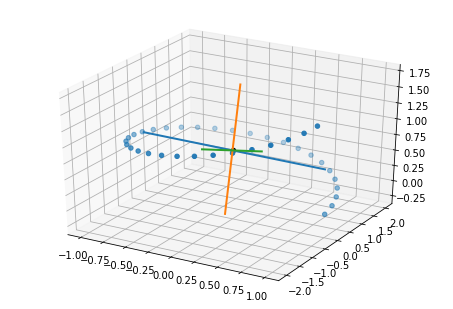

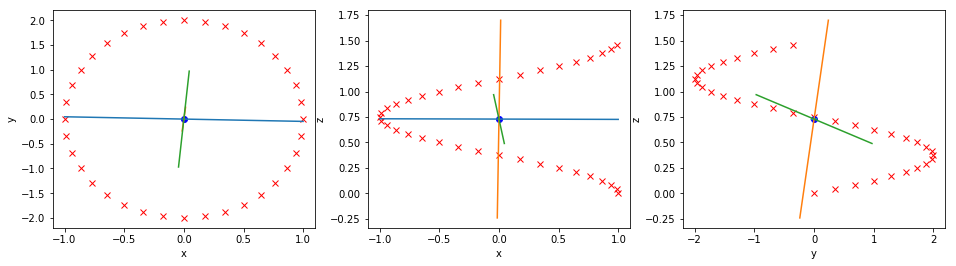

(36, 3)

In [15]:
plot_pca(data)
data.shape

In [6]:
data.shape

(36, 3)